# Feature extraction from 20 newsgroups documents

In [1]:
from os import listdir
from os.path import isfile, join
import string
import numpy as np

In [2]:
my_path = '20_newsgroups'
#creating a list of folder names to make valid pathnames later
folders = [f for f in listdir(my_path)]
folders

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
#creating a 2D list to store list of all files in different folders
files = []
for folder_name in folders:
    folder_path = join(my_path, folder_name)
    files.append([f for f in listdir(folder_path)])

#checking total no. of files gathered
sum(len(files[i]) for i in range(20))


19997

In [4]:
#creating a list of pathnames of all the documents
#this would serve to split our dataset into train & test later without any bias
pathname_list = []
for fo in range(len(folders)):
    for fi in files[fo]:
        pathname_list.append(join(my_path, join(folders[fo], fi)))
len(pathname_list)
#making an array containing the classes each of the documents belong to


19997

In [5]:
Y = []
for fo in range(len(folders)):
    for i in range(len(files[fo])):
        Y.append(folders[fo])
len(Y)

19997

##### splitting the data into train test


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(pathname_list,Y,random_state=0,test_size=0.3)

In [7]:
stopwords=["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz"]

In [8]:
def plot_words_and_count(dict1):
    c=dict1.copy()
    count={}
    for (key,value) in dict1.items():
        if(value in count):
            count[value]+=1
        else:
            count[value]=1
    import matplotlib.pyplot as plt

    # plt.xlim(0,1000)
    # plt.ylim(150,200)
    plt.xlabel("No. of words")
    plt.ylabel("Frequency")
    plt.grid()
    plt.plot(count.values(),count.keys(),"b.")
    plt.show()

In [9]:
#make dictionary
def make_dict(path_list,limit=0):
    dict1={}
    for file in path_list:
        f=open(file,"r",encoding="latin1")
        data=f.read().split("\n")
        for sen in data:
            if(':' not in sen):
                words=sen.split(' ')
                for word in words:
                    word=word.lower()#all covert to lowercase
                    #dont take stopwords and len<=3 words
                    if(word not in stopwords and len(word)>3):
                        if(word not in dict1):
                            dict1[word]=1
                            if(":" in word):
                                print(file,"\t",word)
                        else:
                            dict1[word]=dict1[word]+1
   
    c=dict1.copy()
    
    #cleaning data

    #delete less frequency and very large words
    for i in list(c):
        if(c[i]<limit) or len(i)>30:
            del c[i]

    delete=["1","2","3","4","5","6","7","8","9","0","!","@","%","^","&","*","_","=","+","{","}","[","]","|",";",":","<","`","~","\\"]
    split=["\t","\n"," ","(",")","?",",",">",".","\""]
    #delete about all elements in delete : 
    for i in list(c):
        for deli in delete:
            if(deli in i):
                del c[i]
                break
    d=c.copy()
    #split about all sp in split[]
    c={}
    for (key,value) in d.items():
        keys=[key]
        for sp in split:
            a=set()
            for k in keys:
                for x in k.split(sp):
                    a.add(x)
            keys=a
        for k in keys:
            if(k in c):
                c[k]=c[k]+value
            else:
                c[k]=value
    #delete excess dash ---
    for w in list(c):
        if(len(w.split("-"))==len(w)+1):
            # print(w," ",c[w])
            del c[w]

    #delete less sized words and stopwords
    for i in list(c):
        if(len(i)<4 or i in stopwords):
            del c[i]
    return c

In [10]:
dict1=make_dict(x_train,103)

In [11]:
print(len(dict1))

1605


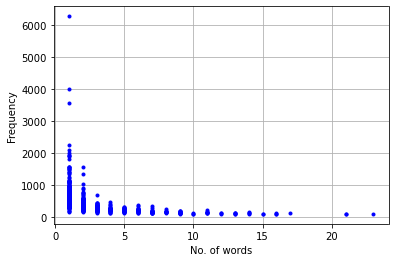

In [12]:
plot_words_and_count(dict1)

In [13]:
#checking just..
def check(c):
    sp=["\t","@","#","/","-",".","\\","1","2","3","4","5","6","7","8","9","0","!","%","^","&","*","(",")","_","=","+","{","[","]","}","|",";",":","?",",",">","<","`","~"]
    for x in sp:
        print(x," : ------------------------")
        for w in c:
            if x in w :
                print(w,"\t",c[w])       

In [14]:
print("len(dict1) : ",len(dict1))

len(dict1) :  1605


In [15]:
vocab=np.array(list(dict1.keys()))
vocab.size,len(dict1)

(1605, 1605)

In [16]:
#define array to fill frequency to vocab
x_train_vc=np.zeros([len(x_train),len(vocab)],dtype=int)
x_test_vc=np.zeros([len(x_test),len(vocab)],dtype=int)

In [17]:
d=dict1.copy()
for i in d:
    d[i]=0
print(len(d))


1605


In [18]:
for i in range(len(x_train)):
    count=d.copy()
    # print(len(count))
    entry=make_dict([x_train[i]])
    for e in entry:
        if e in count:
            count[e]=entry[e]
            # if(count[e]>0):
                # print(i," count :",e," ",count[e])                
    x_train_vc[i]=np.array(list(count.values()))
    # for  j in len(vocab):

In [19]:
# print(x_train_vc.sum())
# [i.sum() for i in x_train_vc]
len(dict1)

1605

In [20]:
#make x_test_vocab_count
for i in range(len(x_test)):
    count=d.copy()
    entry=make_dict([x_test[i]])
    for e in entry:
        if e in count:
            count[e]=entry[e]
            # if(count[e]>0):
                # print(i," count :",e," ",count[e])                
    x_test_vc[i]=np.array(list(count.values()))

In [21]:
# print(x_test_vc.sum())
# [i.sum() for i in x_test_vc]

# Text Classification


### performing Text Classification using sklearn's Multinomial Naive Bayes

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [23]:
clf=MultinomialNB()
clf.fit(x_train_vc,y_train)


MultinomialNB()

In [24]:
clf.predict(x_test_vc)

array(['comp.windows.x', 'rec.motorcycles', 'talk.politics.guns', ...,
       'soc.religion.christian', 'rec.sport.baseball',
       'talk.politics.mideast'], dtype='<U24')

In [25]:
print(classification_report(y_train,clf.predict(x_train_vc)))

                          precision    recall  f1-score   support

             alt.atheism       0.54      0.72      0.62       726
           comp.graphics       0.61      0.66      0.64       699
 comp.os.ms-windows.misc       0.67      0.71      0.69       692
comp.sys.ibm.pc.hardware       0.65      0.66      0.65       716
   comp.sys.mac.hardware       0.69      0.69      0.69       703
          comp.windows.x       0.79      0.69      0.74       705
            misc.forsale       0.74      0.77      0.75       694
               rec.autos       0.76      0.77      0.76       680
         rec.motorcycles       0.76      0.80      0.78       676
      rec.sport.baseball       0.83      0.83      0.83       691
        rec.sport.hockey       0.88      0.89      0.89       726
               sci.crypt       0.87      0.80      0.83       722
         sci.electronics       0.75      0.67      0.71       693
                 sci.med       0.83      0.77      0.79       703
         

In [26]:
print(classification_report(y_test,clf.predict(x_test_vc)))

                          precision    recall  f1-score   support

             alt.atheism       0.43      0.61      0.51       274
           comp.graphics       0.54      0.53      0.54       301
 comp.os.ms-windows.misc       0.64      0.65      0.65       308
comp.sys.ibm.pc.hardware       0.59      0.59      0.59       284
   comp.sys.mac.hardware       0.62      0.60      0.61       297
          comp.windows.x       0.69      0.65      0.67       295
            misc.forsale       0.68      0.70      0.69       306
               rec.autos       0.69      0.69      0.69       320
         rec.motorcycles       0.70      0.73      0.71       324
      rec.sport.baseball       0.81      0.73      0.77       309
        rec.sport.hockey       0.79      0.88      0.83       274
               sci.crypt       0.84      0.79      0.82       278
         sci.electronics       0.63      0.59      0.61       307
                 sci.med       0.74      0.71      0.73       297
         

In [27]:
labels=list(set(Y))
labels

['misc.forsale',
 'talk.religion.misc',
 'comp.graphics',
 'rec.sport.hockey',
 'soc.religion.christian',
 'comp.os.ms-windows.misc',
 'rec.motorcycles',
 'rec.sport.baseball',
 'sci.electronics',
 'sci.med',
 'rec.autos',
 'talk.politics.guns',
 'comp.sys.mac.hardware',
 'comp.sys.ibm.pc.hardware',
 'comp.windows.x',
 'sci.crypt',
 'talk.politics.mideast',
 'sci.space',
 'talk.politics.misc',
 'alt.atheism']

In [28]:
cm=confusion_matrix(y_test,clf.predict(x_test_vc),labels=labels)
print(type(cm))

<class 'numpy.ndarray'>


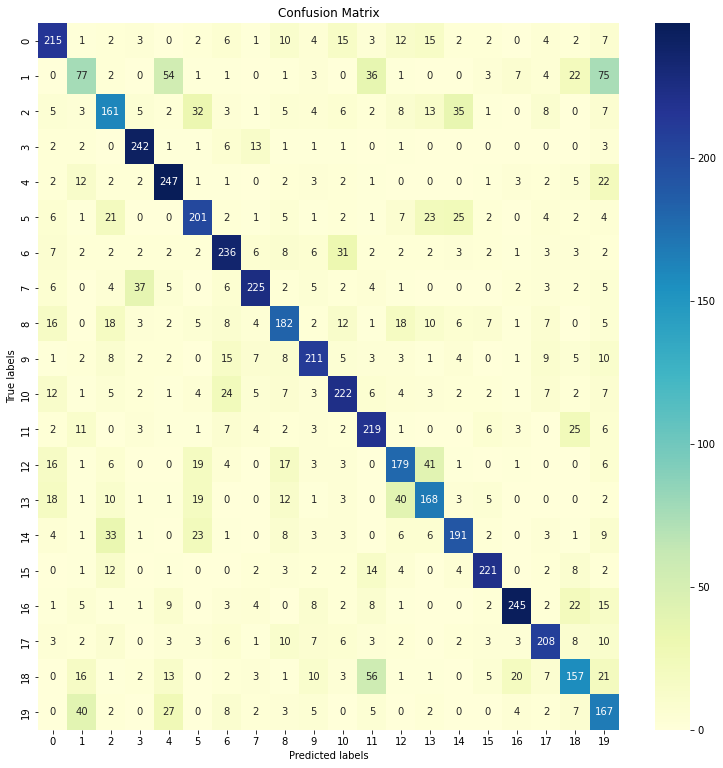

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt     
plt.figure(figsize=(13,13))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',cmap="YlGnBu", ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix') 
# ax.xaxis.set_ticklabels(labels)
# ax.yaxis.set_ticklabels(labels.reverse())
plt.show()

In [30]:
groups=list(set(y_train))    

#### Implementing my own training and predicting functions for Multinomial Naive Bayes


In [31]:
def fit(x_train,y_train):
    count_class_word={}
    for g in groups:
        #last index stores group.count
        count_class_word[g]=np.zeros(len(x_train[0])+1)
        # count_class_word[g]
        for i in range(len(y_train)):
            if(y_train[i]==g):
                count_class_word[g]=count_class_word[g]+np.concatenate([x_train[i],[1]])
    prob_class_ind_att=np.zeros([len(groups),len(x_train[0])])
    for i in range(len(groups)):
        for j in range(len(x_train[0])):
            den=np.log(count_class_word[groups[i]][len(x_train[0])]+len(groups))
            prob_class_ind_att[i][j]=np.log(count_class_word[groups[i]][j]+1)-den
    # print(len(count_class_word),len(count_class_word[groups[0]]))
    prob_class=np.log([count_class_word[groups[gi]][len(x_train[0])] for gi in range(len(groups)) ])

    prob_class=[prob_class[i]-np.log(len(x_train)) for i in range(len(prob_class))]
    return prob_class_ind_att,prob_class


In [32]:
def predict(prob_class_ind_att,prob_class,x_test):

    prediction=list(np.zeros(len(x_test)))
    for i in range(len(x_test)):
        prob=np.zeros(len(groups))
        for j in range(len(groups)):

            prob[j]=prob_class[j]
            temp=0
            for k in range(len(x_test[i])):
                prob[j]+=x_test[i][k]*float(prob_class_ind_att[j][k])
                # print(prob_class_ind_att[j][k])
        max_prob_i=0
        for x in range(len(prob)):
            if(prob[max_prob_i]<=prob[x]):
                max_prob_i=x
        # print(x)
        prediction[i]=groups[max_prob_i]
    return prediction
        

In [33]:
def singlepointpred(prob_class_ind_att,prob_class,x):
    max_prob=-1000
    # for gi in range(len(groups)):
    # m=np.array(prob).max()
    m=0
    for gi in range(len(groups)):
        curr_prob=prob_class[gi]
        for k in range(len(x)):
                curr_prob+=x[k]*float(prob_class_ind_att[gi][k])
        if(curr_prob>=max_prob):
            max_prob=curr_prob
            m=gi
    return groups[m]

In [34]:
def predict1(prob_class_ind_att,prob_class,x_test):
    # prob=
    prediction=[]
    for x in x_test:
        y_pred=singlepointpred(prob_class_ind_att,prob_class,x)
        prediction.append(y_pred)
    return prediction
        

In [35]:
prob_class_ind_att,prob_class=fit(x_train_vc,y_train)

In [36]:
x=x_train_vc[:100,:]


In [37]:
# print(prob_class_ind_att)
x_pred=predict1(prob_class_ind_att,prob_class,x)

In [38]:
x_pred

['sci.crypt',
 'sci.crypt',
 'misc.forsale',
 'rec.sport.hockey',
 'rec.sport.baseball',
 'alt.atheism',
 'sci.med',
 'talk.politics.misc',
 'sci.med',
 'sci.crypt',
 'sci.crypt',
 'talk.politics.guns',
 'alt.atheism',
 'comp.sys.ibm.pc.hardware',
 'rec.sport.hockey',
 'rec.sport.hockey',
 'soc.religion.christian',
 'comp.graphics',
 'sci.med',
 'talk.politics.mideast',
 'sci.crypt',
 'sci.med',
 'soc.religion.christian',
 'alt.atheism',
 'alt.atheism',
 'alt.atheism',
 'sci.space',
 'comp.sys.mac.hardware',
 'soc.religion.christian',
 'talk.politics.misc',
 'rec.autos',
 'comp.sys.mac.hardware',
 'talk.politics.guns',
 'soc.religion.christian',
 'sci.space',
 'talk.politics.misc',
 'soc.religion.christian',
 'rec.sport.hockey',
 'sci.med',
 'sci.crypt',
 'comp.graphics',
 'rec.autos',
 'talk.politics.misc',
 'comp.sys.mac.hardware',
 'rec.sport.hockey',
 'sci.electronics',
 'sci.crypt',
 'comp.graphics',
 'talk.politics.misc',
 'sci.crypt',
 'talk.politics.mideast',
 'sci.crypt',
 'so

In [47]:

y_test_pred=predict1(prob_class_ind_att,prob_class,x_test_vc)

In [40]:
y_test_pred

['comp.windows.x',
 'talk.politics.misc',
 'talk.politics.guns',
 'soc.religion.christian',
 'rec.sport.hockey',
 'talk.religion.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.graphics',
 'sci.space',
 'comp.graphics',
 'talk.politics.misc',
 'comp.sys.mac.hardware',
 'talk.politics.misc',
 'soc.religion.christian',
 'rec.sport.hockey',
 'talk.politics.mideast',
 'sci.crypt',
 'talk.politics.misc',
 'comp.os.ms-windows.misc',
 'talk.politics.misc',
 'talk.politics.guns',
 'misc.forsale',
 'alt.atheism',
 'rec.sport.baseball',
 'sci.electronics',
 'comp.sys.ibm.pc.hardware',
 'comp.os.ms-windows.misc',
 'sci.crypt',
 'soc.religion.christian',
 'sci.crypt',
 'sci.crypt',
 'sci.med',
 'soc.religion.christian',
 'talk.politics.misc',
 'soc.religion.christian',
 'comp.os.ms-windows.misc',
 'talk.politics.mideast',
 'talk.politics.misc',
 'rec.sport.baseball',
 'talk.politics.misc',
 'soc.religion.christian',
 'comp.os.ms-windows.misc',
 'talk.politics.mideast',
 'sci.space',
 'comp.sys.mac.hard

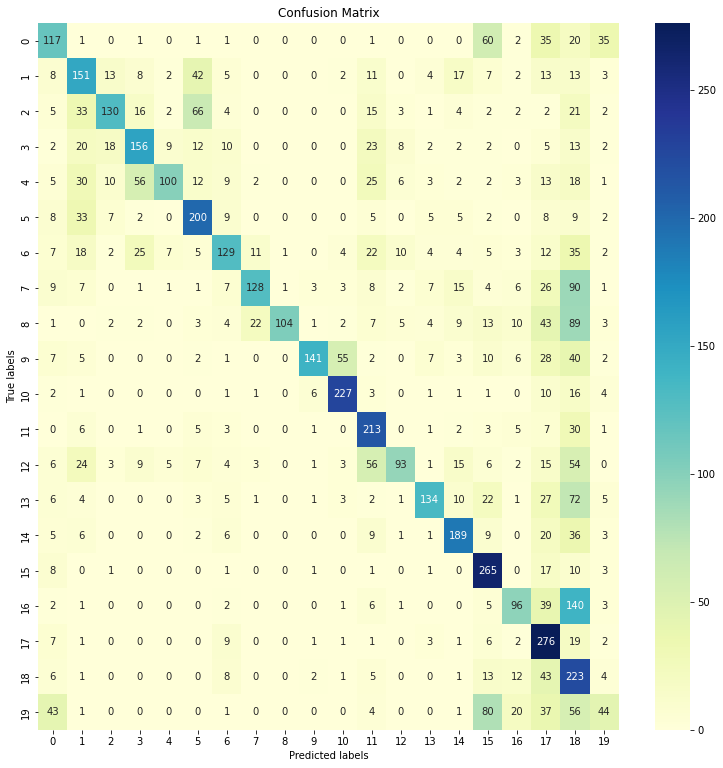

In [41]:
plt.figure(figsize=(13,13))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,y_test_pred), annot=True, fmt='g',cmap="YlGnBu", ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix') 
# ax.xaxis.set_ticklabels(labels)
# ax.yaxis.set_ticklabels(labels.reverse())
plt.show()

In [42]:
print(classification_report(y_test,y_test_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.46      0.43      0.44       274
           comp.graphics       0.44      0.50      0.47       301
 comp.os.ms-windows.misc       0.70      0.42      0.53       308
comp.sys.ibm.pc.hardware       0.56      0.55      0.56       284
   comp.sys.mac.hardware       0.79      0.34      0.47       297
          comp.windows.x       0.55      0.68      0.61       295
            misc.forsale       0.59      0.42      0.49       306
               rec.autos       0.76      0.40      0.52       320
         rec.motorcycles       0.98      0.32      0.48       324
      rec.sport.baseball       0.89      0.46      0.60       309
        rec.sport.hockey       0.75      0.83      0.79       274
               sci.crypt       0.51      0.77      0.61       278
         sci.electronics       0.72      0.30      0.43       307
                 sci.med       0.75      0.45      0.56       297
         

In [43]:
y_train_pred=predict1(prob_class_ind_att,prob_class,x_train_vc)


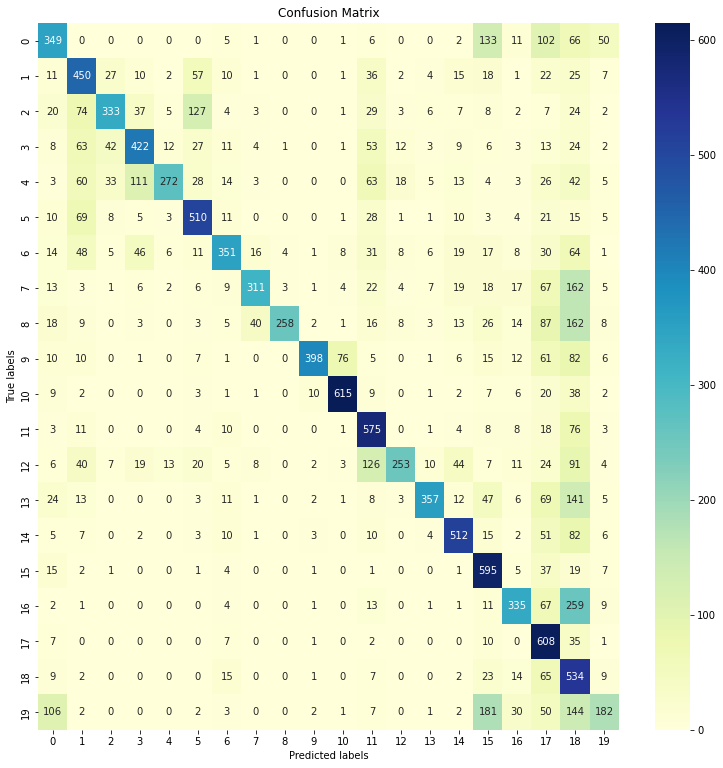

In [44]:
plt.figure(figsize=(13,13))
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_train,y_train_pred), annot=True, fmt='g',cmap="YlGnBu", ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix') 
# ax.xaxis.set_ticklabels(labels)
# ax.yaxis.set_ticklabels(labels.reverse())
plt.show()

In [45]:
print(classification_report(y_train,y_train_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.54      0.48      0.51       726
           comp.graphics       0.52      0.64      0.58       699
 comp.os.ms-windows.misc       0.73      0.48      0.58       692
comp.sys.ibm.pc.hardware       0.64      0.59      0.61       716
   comp.sys.mac.hardware       0.86      0.39      0.53       703
          comp.windows.x       0.63      0.72      0.67       705
            misc.forsale       0.71      0.51      0.59       694
               rec.autos       0.80      0.46      0.58       680
         rec.motorcycles       0.97      0.38      0.55       676
      rec.sport.baseball       0.94      0.58      0.71       691
        rec.sport.hockey       0.86      0.85      0.85       726
               sci.crypt       0.55      0.80      0.65       722
         sci.electronics       0.81      0.37      0.50       693
                 sci.med       0.87      0.51      0.64       703
         

In [46]:
y_train_pred=predict1(prob_class_ind_att,prob_class,x_train_vc)
